# Plotting the station on a map

## Python version

In [1]:
import sys

In [3]:
sys.version

'3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:59:51) \n[GCC 9.4.0]'

## Import packages and data

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
url = 'https://gbfs.baywheels.com/gbfs/en/station_information.json'
req = requests.get(url)


In [22]:
df_sf = pd.DataFrame(req.json()['data']['stations']).drop(columns=['rental_uris'])

In [56]:
df.columns

Index(['lon', 'station_id', 'region_id', 'lat', 'name', 'rental_methods',
       'short_name', 'station_type', 'electric_bike_surcharge_waiver',
       'eightd_has_key_dispenser', 'eightd_station_services', 'external_id',
       'has_kiosk', 'legacy_id', 'capacity'],
      dtype='object')

In [57]:
df['region_id'].unique()

array(['5', '3', '14', '0', '12', '13', nan], dtype=object)

In [67]:
df_ext = df.loc[df['region_id'] == '0']

In [68]:
df_ext

,lon,station_id,region_id,lat,name,rental_methods,short_name,station_type,electric_bike_surcharge_waiver,eightd_has_key_dispenser,eightd_station_services,external_id,has_kiosk,legacy_id,capacity
85,-122.479492,36ecea1d-48aa-416b-96d3-7698658759e5,0,37.763527,Irving St at 21st Ave,"[KEY, CREDITCARD]",SF-M8,classic,False,False,[],36ecea1d-48aa-416b-96d3-7698658759e5,True,571,19
93,-122.269146,492edeb7-7c9f-4845-b5cc-442faedb3a56,0,37.802688,13th St at Webster St,"[KEY, CREDITCARD]",OK-L6-2,classic,False,False,[],492edeb7-7c9f-4845-b5cc-442faedb3a56,True,546,19
101,-122.411536,2d63ccd8-6a9a-49de-9404-2ebb9ac3bf59,0,37.806929,North Point St at Powell St,"[KEY, CREDITCARD]",SF-A25,classic,False,False,[],2d63ccd8-6a9a-49de-9404-2ebb9ac3bf59,True,548,28
159,-122.277188,f665c653-569b-4a5d-b80d-67f2e4191f77,0,37.823523,Brockhurst St at San Pablo Ave,"[KEY, CREDITCARD]",OK-H2-2,classic,False,False,[],f665c653-569b-4a5d-b80d-67f2e4191f77,True,f665c653-569b-4a5d-b80d-67f2e4191f77,19
172,-122.413914,73f89d7b-016f-425d-8436-617fa0e977fc,0,37.774479,Howard St at Grace St,"[KEY, CREDITCARD]",SF-K24-2,classic,False,False,[],73f89d7b-016f-425d-8436-617fa0e977fc,True,570,11
203,-122.409279,e01b3ae0-0543-484f-9085-bff4af3c174c,0,37.807171,North Point St at Grant Ave,"[KEY, CREDITCARD]",SF-A26,classic,False,False,[],e01b3ae0-0543-484f-9085-bff4af3c174c,True,547,19
228,-122.443238,fed768af-80bd-4567-9a94-df9b7e369433,0,37.724893,Balboa Park (San Jose Ave at Sgt. John V. Youn...,"[KEY, CREDITCARD]",SF-Y16,classic,False,False,[],fed768af-80bd-4567-9a94-df9b7e369433,True,501,23
251,-122.435474,71a4bb9f-1cec-4b1e-9534-51e82c9201d0,0,37.727395,Alemany Blvd at Francis St,"[KEY, CREDITCARD]",SF-Y18,classic,False,False,[],71a4bb9f-1cec-4b1e-9534-51e82c9201d0,True,568,23
269,-122.272924,3e870ef6-b3ee-4e56-9d22-156fdb2f8155,0,37.822684,West St at Brockhurst St,"[KEY, CREDITCARD]",OK-H3-2,classic,False,False,[],3e870ef6-b3ee-4e56-9d22-156fdb2f8155,True,574,19
321,-122.405484,60e50c5b-b924-4c2d-83bb-c8fe97e6c4c3,0,37.789710,Grant Ave at Sutter St,"[KEY, CREDITCARD]",SF-F26-2,classic,False,False,[],60e50c5b-b924-4c2d-83bb-c8fe97e6c4c3,True,60e50c5b-b924-4c2d-83bb-c8fe97e6c4c3,33


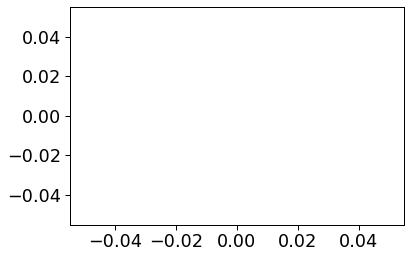

In [66]:
plt.scatter(df_ext.lon, df_ext.lat)

In [9]:
#!pip install zipf
import zipfile

In [34]:
with zipfile.ZipFile('tl_2021_06075_roads.zip', 'r') as zip_ref:
    zip_ref.extractall('shapefiles')

In [15]:
import geopandas as gpd

In [35]:
# Import shapefile as GeoDataFrame
geo_df = gpd.read_file('shapefiles/tl_2021_06075_roads.shp')

In [36]:
geo_df

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110498938773,Hwy 101 S Off Rmp,M,S1400,"LINESTRING (-122.40410 37.74842, -122.40397 37..."
1,110498937425,Hwy 101 N on Rmp,M,S1400,"LINESTRING (-122.47441 37.80691, -122.47461 37..."
2,1108475858996,US Hwy 101 Bus,U,S1200,"LINESTRING (-122.42461 37.80130, -122.42460 37..."
3,1103660229533,Ludlow Aly - No Acc,M,S1780,"LINESTRING (-122.45959 37.73853, -122.45956 37..."
4,1104995434770,Old Mason St,M,S1400,"LINESTRING (-122.45456 37.80419, -122.45492 37..."
...,...,...,...,...,...
4078,110498939543,Friendship Ct,M,S1400,"LINESTRING (-122.43073 37.77781, -122.43084 37..."
4079,110498940789,None,None,S1400,"LINESTRING (-122.45077 37.77880, -122.45070 37..."
4080,110498932589,Flint St,M,S1400,"LINESTRING (-122.43654 37.76398, -122.43673 37..."
4081,110498939711,Twin Peaks Blvd,M,S1400,"LINESTRING (-122.44721 37.75404, -122.44687 37..."


In [61]:
df_sf.region_id.unique()

array(['5', '3', '14', '0', '12', '13', nan], dtype=object)

In [38]:
geo_df.loc[geo_df['FULLNAME'] == 'Octavia St']

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
1005,11016957645924,Octavia St,M,S1400,"LINESTRING (-122.42366 37.77178, -122.42369 37..."
2384,110498936857,Octavia St,M,S1400,"LINESTRING (-122.42780 37.79243, -122.42798 37..."
2902,110498936855,Octavia St,M,S1400,"LINESTRING (-122.42667 37.78692, -122.42687 37..."
4052,11016957645925,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42387 37..."
4082,11016957626758,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42366 37..."


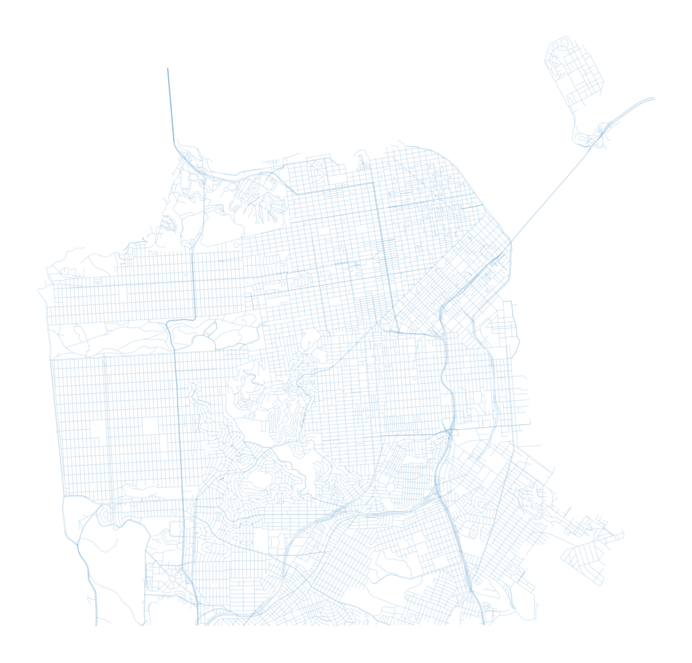

In [39]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
#ctx.add_basemap(ax)

# Turn off axis
ax.set_axis_off()
# Save image
fig.tight_layout()

In [40]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point

In [55]:
df_sf.loc[df_sf['lon'] < -122.35]

,lon,station_id,region_id,lat,name,rental_methods,short_name,station_type,electric_bike_surcharge_waiver,eightd_has_key_dispenser,eightd_station_services,external_id,has_kiosk,legacy_id,capacity,geometry
82,-122.400104,a2698d11-5b7e-4421-90ed-7d7225a58a67,3,37.793489,Battery St at California St,"[KEY, CREDITCARD]",SF-E28-3,classic,False,False,[],a2698d11-5b7e-4421-90ed-7d7225a58a67,True,559,33,POINT (-122.40010 37.79349)
83,-122.439078,b1a957d2-5e0e-4a99-bca3-7f3db21d30eb,3,37.773063,Broderick St at Oak St,"[KEY, CREDITCARD]",SF-K18,classic,False,False,[],b1a957d2-5e0e-4a99-bca3-7f3db21d30eb,True,71,27,POINT (-122.43908 37.77306)
85,-122.479492,36ecea1d-48aa-416b-96d3-7698658759e5,0,37.763527,Irving St at 21st Ave,"[KEY, CREDITCARD]",SF-M8,classic,False,False,[],36ecea1d-48aa-416b-96d3-7698658759e5,True,571,19,POINT (-122.47949 37.76353)
87,-122.426806,0fc2ae3f-b5ac-493b-bd93-8300b601f9db,3,37.743684,29th St at Church St,"[KEY, CREDITCARD]",SF-T20,classic,False,False,[],0fc2ae3f-b5ac-493b-bd93-8300b601f9db,True,145,15,POINT (-122.42681 37.74368)
89,-122.386892,1a7a0757-fbbb-497e-b92b-cb0817cab274,3,37.741978,Evans Ave at Newhall St,"[KEY, CREDITCARD]",SF-U30,classic,False,False,[],1a7a0757-fbbb-497e-b92b-cb0817cab274,True,509,19,POINT (-122.38689 37.74198)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,-122.447291,175541bb-0ac6-42ba-bb50-071317d1237b,3,37.779047,Masonic Ave at Turk St,"[KEY, CREDITCARD]",SF-I16,classic,False,False,[],175541bb-0ac6-42ba-bb50-071317d1237b,True,380,23,POINT (-122.44729 37.77905)
491,-122.386333,460,3,37.769095,Terry Francois Blvd at Warriors Way,"[CREDITCARD, KEY]",SF-M30-2,classic,False,False,[],87168190-5491-47c8-bb9b-187ddf6052c3,True,460,15,POINT (-122.38633 37.76909)
492,-122.442729,577,NaN,37.799175,Divisadero St at Lombard St,"[CREDITCARD, KEY]",SF-C18,classic,False,False,[],82ad4cff-001f-49a8-88fa-a5a63d64b9a2,True,577,22,POINT (-122.44273 37.79918)
493,-122.444305,578,NaN,37.730655,Detroit St at Hearst Ave,"[CREDITCARD, KEY]",SF-X16,classic,False,False,[],41b2200f-7915-410b-95c6-084bc4d3dee8,True,578,19,POINT (-122.44430 37.73066)


In [73]:
# Add a geometry column that holds Point objects
df_sf['geometry'] = df_sf.apply(lambda x: Point(float(x.lon), float(x.lat)), axis=1)
# Convert Pandas DataFrame to a GeoDataFrame
stations_gpdf = gpd.GeoDataFrame(df_sf.loc[df_sf['lon'] < -122.35], geometry='geometry')
# Initialize crs to 4326 because that's the format of our geomtry
#starbucks_geo_df.crs = "EPSG:4326"
# Change the crs to match our SF GeoDataFrame
#starbucks_geo_df = starbucks_geo_df.to_crs(epsg = 3857)


/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Text(0.5, 1.0, 'Baywheels Stations in San Francisco')

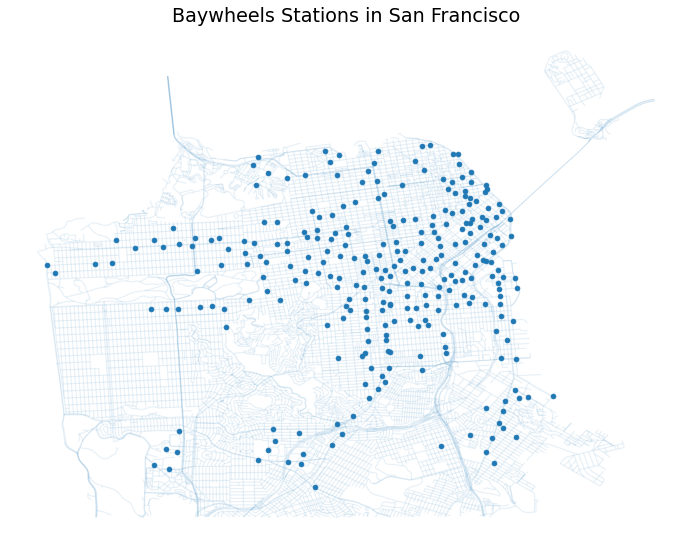

In [74]:
# Change context for readability
sns.set_context("paper", font_scale=2)
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
stations_gpdf.plot(ax=ax)
# Add in a background using contextily
#ctx.add_basemap(ax)
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("Baywheels Stations in San Francisco")